# Regresión lineal -Minimos cuadrados
$$m = \frac{\bar{xy} - \bar{x}\bar{y}}{\bar{x_i^2}-\bar{x_i}^2} $$
$$b = \bar{y}-m\bar{x} $$
### En M.L.
E: error se vuelve $\text{L}$ tal que $L = \frac{1}{N} \sum_i L_i(x_i,f_i(x_i;w_o,w_1))$, y se vuelve $\text{t}$ ; (m,b) a ($w_0,w_1$). x: predictor
$$\hat{w_0} = \bar{t} - \hat{w_1} \bar{x}$$
$$\hat{w_1} = \bar{xt} - \bar{x}\bar{t}$$
buscamos el agumento minimo de L de $w_0,w_1$ (Nota: w son los pesos para cada variable) \
$$f(x_n;w_0,w_1) = w_0 + w_1 x_n$$
Cuando hay j varibles, deberíamos buscar j+1 ecuaciones para cada peso $w_{j-1}$ para minimizar L (derivando). \
Buscaremos otro metodo para no tener que derivar cada vez que lo necesitemos (matrices). \
El machine learning es cuando la computadora hace las cosas sin que yo le diga como. \
### Ejemplo para dos variables
$$ w = \begin{pmatrix} w_0 \\ w_1 \end{pmatrix}$$ $$x_n = \begin{pmatrix} 1 \\ x_n \end{pmatrix}$$
La $\text{L}$ traducida a matrices es: $$L = \frac{1}{N} (t-Xw)^T(t-Xw) $$
con $X = \begin{pmatrix} {x_1}^T\\{x_2}^T \\... \\ {x_n}^T \end{pmatrix}=\begin{pmatrix} 1 && x_1 \\1 && x_2\\ ... && ...\\1 && x_n \end{pmatrix}$ \
Si quisieramos añadir otra variiable (lo que sea) solo añadiriamos otro peso i.e. cambiaríamos las dimensiones de nuestras matrices (también $\text{X}$). \



Usando $(Xw)^T = w^TX^T$ para escribir $L = \frac{1}{N} (w^TX^T -t^T)(Xw - t)$ \
Encontramos la relación $L = \frac{1}{N}w^TX^TXw - \frac{2}{N}w^TX^Tt +\frac{1}{N}t^Tt$ Despues Aplicamos la derivada respecto a la matriz w que es $\frac{∂L}{∂w} = 0$ y suamos las propiedades adjuntas
<img src="">


Despejando $\text{w}$ obtenemos el resultado $w = (X^TX)^{-1}X^Tt$ \
Pero nos damos cuenta que $X^TX = N  \begin{pmatrix} 1 && \bar{x} \\ \bar{x} && \bar{x^2} \end{pmatrix} $   y    $(X^TX)^{-1} = N  \begin{pmatrix} \bar{x^2} && -\bar{x} \\ -\bar{x} && 1 \end{pmatrix} $ \
Y llegamos a $$\hat{w} =
 \begin{pmatrix} \bar{x^2}\bar{t} -\bar{x}\bar{xt} \\ -\bar{x}\bar{t} + \bar{xt} \end{pmatrix}\frac{1}{\bar{x^2} -\bar{x}^2} $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

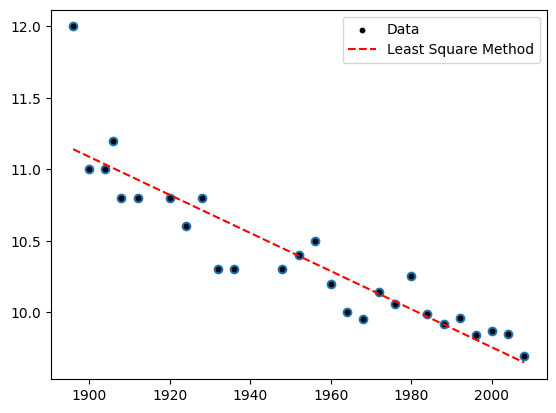

In [14]:
data = np.loadtxt('olympic100m_men.txt', delimiter=',').T

data.shape
x = data[0]
y = data[1]
plt.scatter(x, y);

def min_cuadrados(x, y):
    N = len(x)
    m = (np.sum(x*y) - np.sum(x)*np.sum(y)/N)/(np.sum(x*x) - (np.sum(x)**2)/N)
    b = (np.sum(y) - m*np.sum(x))/N

    return (m, b)
slope, b0 = min_cuadrados(x, y)

x1 = np.linspace(np.min(x), np.max(x), 250)
plt.scatter(x, y, color='black', s=10, label = 'Data')
plt.plot(x1, slope*x1 + b0, color = 'red', ls ='--', label = 'Least Square Method')
plt.legend();

### Funcion que reciba x y y pero con oepraciones matriciales y que devuelva w

In [15]:
def ws(X,y):
  X = np.vstack((np.ones_like(x),x)).T
  t = y
  XX = np.matmul(X.T,X)
  invXX = np.linalg.inv(XX)
  Xt = np.matmul(X.T,t)
  w = np.matmul(invXX, Xt)
  return w



### Modificar la funcion para añadir un termino cuadratico (otro peso)

In [17]:
def ws_2(X,y):
  X = np.vstack((np.ones_like(x),x,x**2)).T
  t = y
  XX = np.matmul(X.T,X)
  invXX = np.linalg.inv(XX)
  Xt = np.matmul(X.T,t)
  w = np.matmul(invXX, Xt)
  return w